In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [241]:
data=pd.read_csv('housing.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [243]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

#             

# Data Visualization

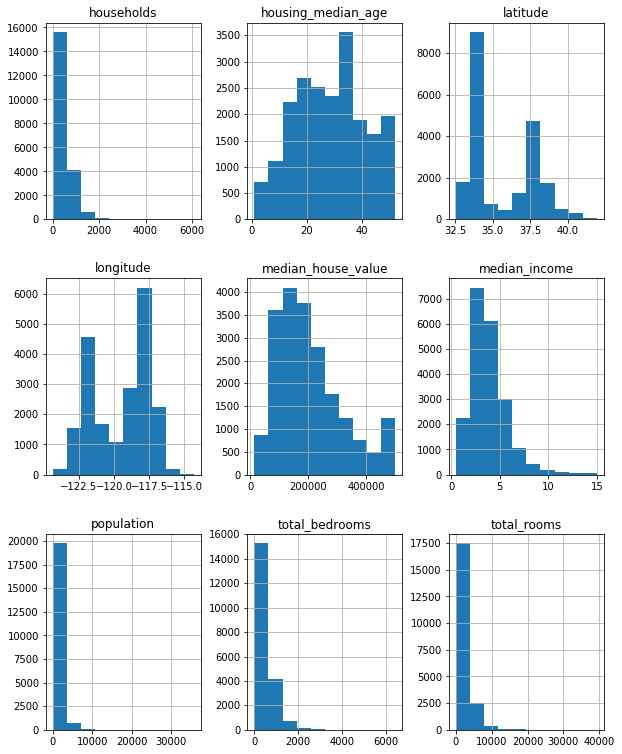

In [244]:
data.hist(figsize=(10,13));

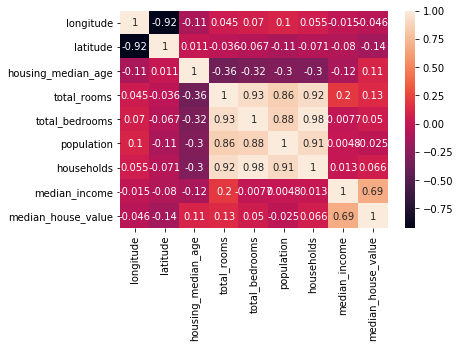

In [245]:
sns.heatmap(data.corr(),annot=True);

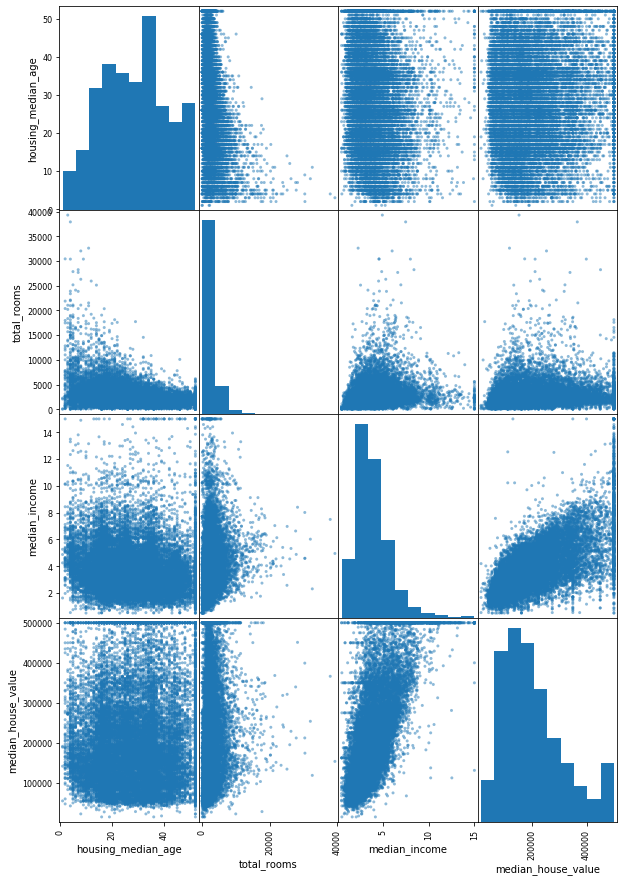

In [246]:
# We need to see some details about the relations
attributes=['housing_median_age','total_rooms','median_income','median_house_value']
pd.plotting.scatter_matrix(data[attributes],figsize=(10,15));

### Some insights from these plots:
- The **mean** of **house price** is 206855$
- The **mean** of **house age** is 28 years:
    - The **newest house** is built from **one year**.
    - The **oldest house** is built from **52 years**.

- Most features that are **related to house price** are:
    - median_income
    - total_rooms (weak relation)
    - house_median_age (weak relation)

>note:<br>
we can observe that the **relations between features are weak** so we need to add some features to solve this problem.

<img ref='C:\Users\habiba\Downloads\clifornia'>

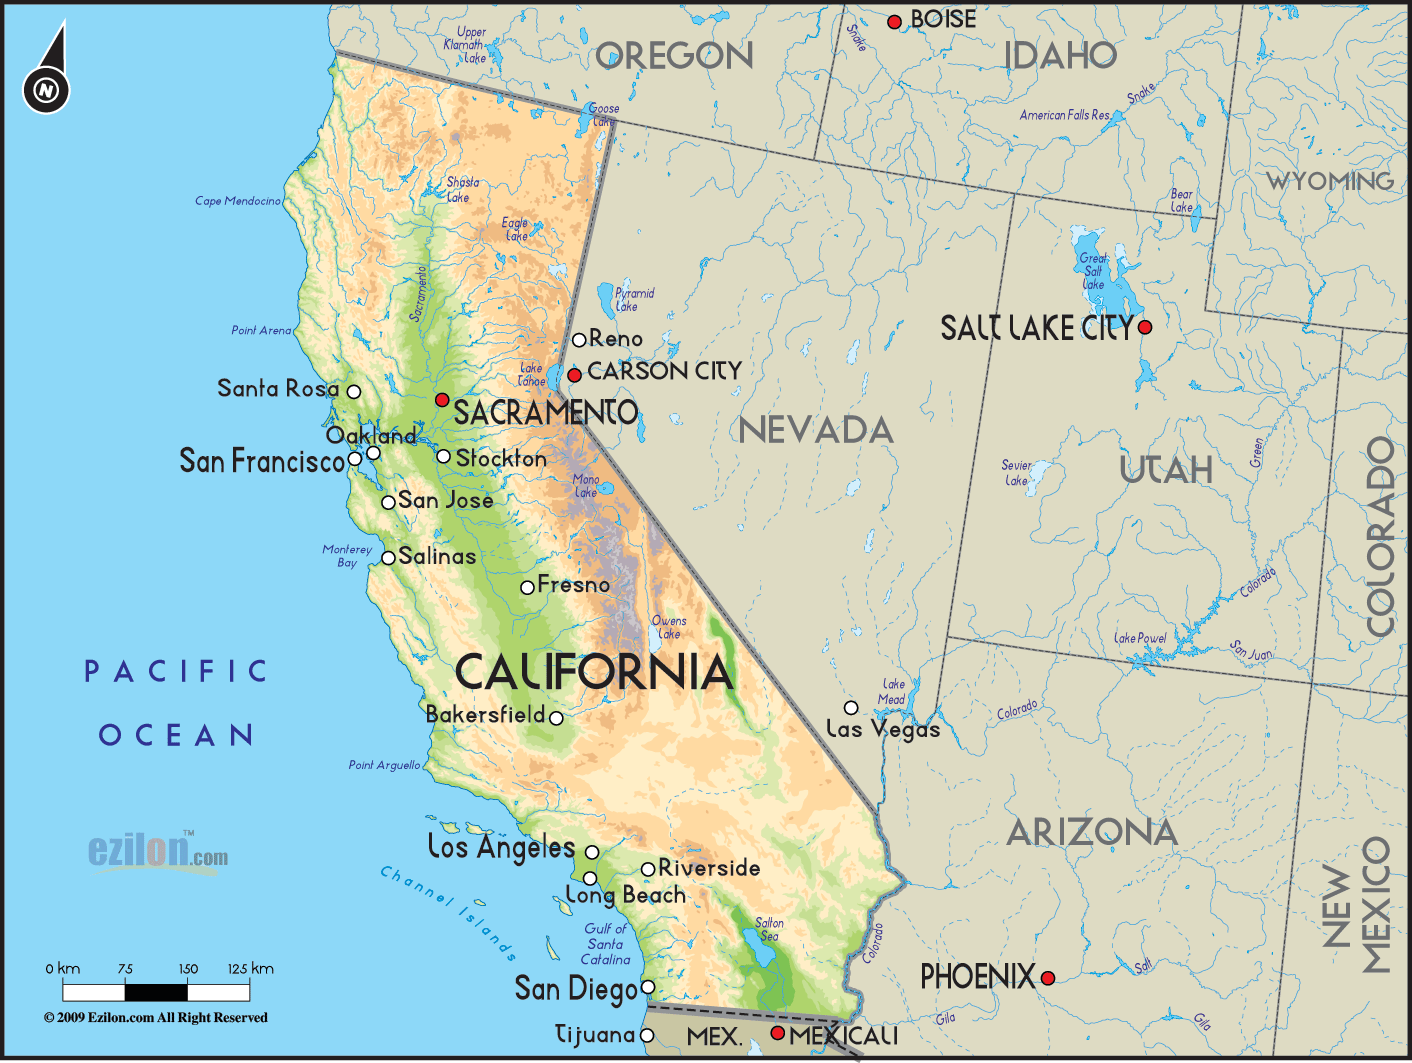

In [247]:
px.scatter(x='longitude',y='latitude',
           data_frame=data,color='median_house_value',title='Distribution of Housing Price')

In [248]:
# To see more details:
px.scatter(x='longitude',y='latitude',data_frame=data,
           facet_col='ocean_proximity',facet_col_wrap=2,
           opacity=0.5,color='median_house_value'
           ,color_continuous_scale=px.colors.cyclical.IceFire,
           title='What is the house price according to ocean proximity?'
  )

**Insights from these plots**:
<ul>
    <li>Most houses that their prices are more than 300k are near the ocean and near the bay
    <li>Houses whose prices are little than 300k are inland

In [249]:
px.scatter(x='longitude',y='latitude',
           data_frame=data,color='population',
           facet_col='ocean_proximity',opacity=0.3
           ,facet_col_wrap=2,color_continuous_scale=px.colors.sequential.gray
           ,color_continuous_midpoint=-10000,title='Which places are crowd?',
          )

In [250]:
px.scatter(data_frame=data,x='longitude',y='latitude',
           color='housing_median_age',
          title='House Age Distribution')

In [251]:
px.scatter(data_frame=data,x='longitude',y='latitude',
           color='housing_median_age',facet_col='ocean_proximity'
           ,facet_col_wrap=2,title='What is the median house age Distribution?'
           ,opacity=0.5
          )

In [252]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [253]:
len(data[(data['housing_median_age']>35) &
     (data['ocean_proximity']=='NEAR BAY')])

1372

**Some insights**:
<ul>
    <li>Most houses are in 1H ocean
    <li>The population in the areas is slightly the same, which is between 700 and 1700
 <hr>
     <li>The most place that has old houses is near bay (house's age>35)
         the number of old houses there 1372 from 2290
     <li>Most of houses are new or less than 35 years
     
          
        

# Data Cleaning

In [254]:
data.isnull().sum().sort_values(ascending=False)[:2]

total_bedrooms     207
ocean_proximity      0
dtype: int64

Text(0.5, 1.0, 'Outliers Of Features')

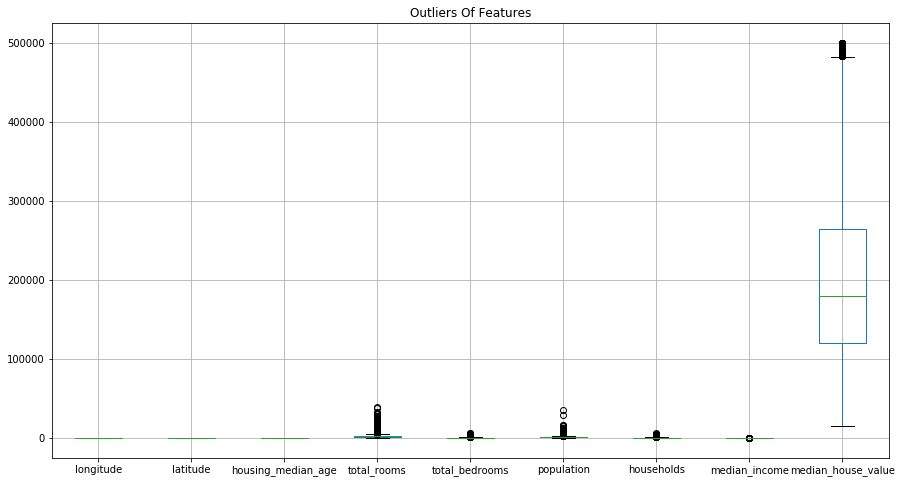

In [255]:
data.boxplot(figsize=(15,8))
plt.title('Outliers Of Features')

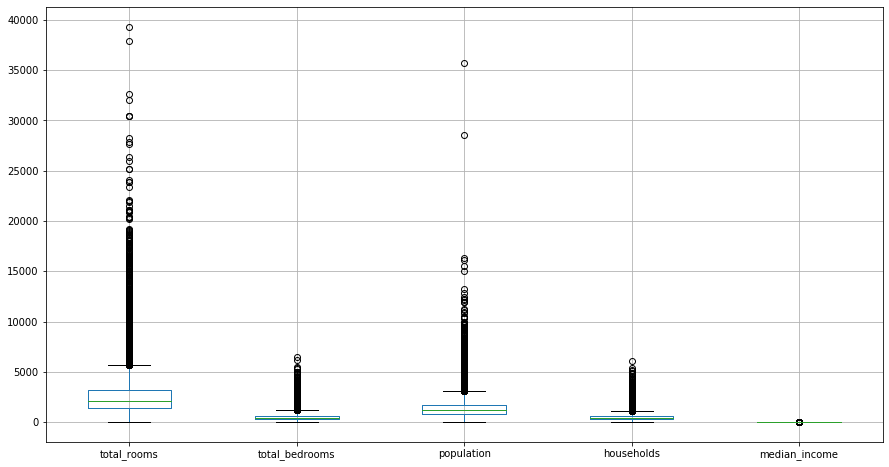

In [256]:
#To see more details about outliers.
data.iloc[:,3:8].boxplot(figsize=(15,8))

>**First** 
> We have many outliers specially in:
        <li>total rooms
        <li>population
        <li>total bedrooms
        <li>households
            <br>
**Second** We need to refill the missing values in total bedrooms. So the best way is median because of outliers.

In [258]:
medain_value=data['total_bedrooms'].median()
data.fillna({'total_bedrooms':medain_value},inplace=True)

In [259]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [260]:
#Check duplicate values
data.duplicated().sum()

0

### We need to deal with outliers in the next section.

**There are 3 ways to deal with outliers**:
<li>Drop outliers
<li>Capping outliers 
<li>Replacing with new values

In [261]:
#Function for counting outliers:
def count_outliers(col,data_frame):
    iqr=stats.iqr(data_frame[col])
    upper_bound=np.quantile(data_frame[col],0.75)+1.5*iqr
    lower_bound=np.quantile(data_frame[col],0.25)-1.5*iqr
    
    f=[]
    
    for i in data_frame[col]:
        if i>upper_bound:
            f.append(i)
        elif i<lower_bound:
            f.append(i)
    count=len(f)
    print(f'The count of outliers in {col} is {count}\nPrecent:{count*100/len(data_frame[col])}')

In [262]:
# function for showing precentage of outliers in each feature:
def show_outliers_percent(lst_of_features,data_frame):
    for i in lst_of_features:
        count_outliers(i,data_frame)
        print()

In [263]:
features=['total_bedrooms','population','total_rooms','households']
show_outliers_percent(features,data)

The count of outliers in total_bedrooms is 1306
Precent:6.327519379844961

The count of outliers in population is 1196
Precent:5.794573643410852

The count of outliers in total_rooms is 1287
Precent:6.2354651162790695

The count of outliers in households is 1220
Precent:5.910852713178294



# Machine Learning Section

>note: We can observe from heatmap that **median income** has a **high correlation** with the output **median house value**
<code> I will try simple linear regression with one variable.

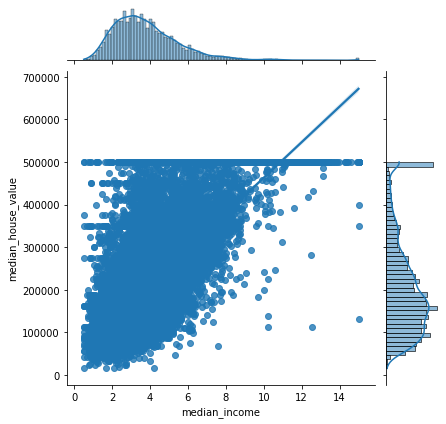

In [264]:
sns.jointplot(data=data,y='median_house_value',x='median_income',kind='reg')

In [265]:
x=data[['median_income']]
y=data[['median_house_value']]

In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [267]:
simple_model=LinearRegression()
simple_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [268]:
print(f'Intercept : {simple_model.intercept_}')
print(f'Coef : {simple_model.coef_}')
print(f'Score : {simple_model.score(x_train,y_train)}')
print(f'Training Error RMSE: {np.sqrt(mean_squared_error(y_train,simple_model.predict(x_train)))}'
     )

Intercept : [44967.56419969]
Coef : [[41788.08698304]]
Score : 0.47430292180263645
Training Error RMSE: 83752.33902656473


Text(0.5, 1.0, 'Model Equation')

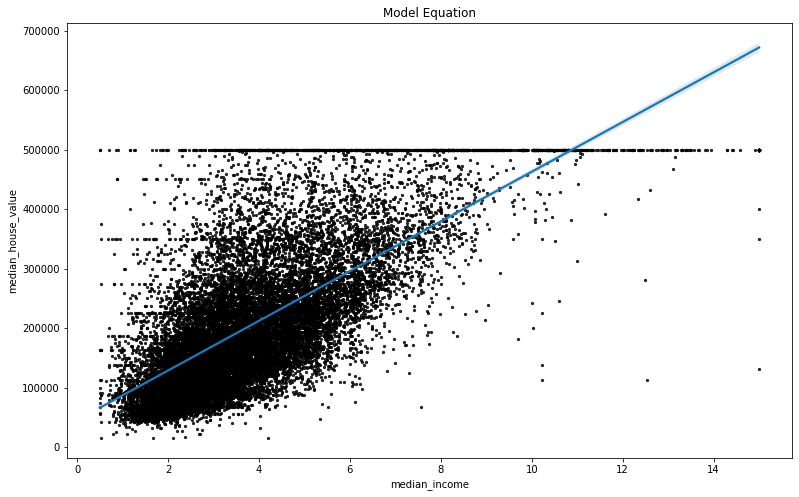

In [269]:
plt.figure(figsize=(13,8))
sns.regplot(data=data,x='median_income',y='median_house_value',
            scatter_kws={'color':'black','s':5}
           )
plt.title('Model Equation')

### Trying cross validation

In [270]:
cross_val_model=cross_val_score(simple_model,x_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [271]:
print(f'Cross Val Score RMSE: {np.sqrt(-cross_val_model.mean())}')

Cross Val Score RMSE: 83761.36424217015


In [272]:
np.sqrt((-cross_val_model).mean())

83761.36424217015

In [273]:
#Test more values of cross val score:
for i in [15,18,22,28,35]:
    test=cross_val_score(simple_model,x_train,y_train,cv=i,scoring='neg_mean_squared_error')
    print(f'Cross Val Score RMSE: {np.sqrt(-test.mean())}')

Cross Val Score RMSE: 83761.72635021852
Cross Val Score RMSE: 83764.74473476414
Cross Val Score RMSE: 83762.37196457692
Cross Val Score RMSE: 83765.34344115193
Cross Val Score RMSE: 83764.42769407036


#              

## Ridge Regression

In [274]:
ridge_model=Ridge(alpha=0.1).fit(x_train,y_train)
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [275]:
ridge_model.coef_

array([[41788.01249756]])

In [276]:
ridge_model.intercept_

array([44967.85307777])

In [277]:
print(f'RMSE : {np.sqrt(mean_squared_error(y_train,ridge_model.predict(x_train)))}')

RMSE : 83752.33902668477
